# A new swimming pool in Madrid

## 1. Introduction

Madrid, the capital of Spain, is well known for its busy streets, loud people, thousands of bars, tasty tapas, and never ending nightlife.

Despite many positive, appealing, and very Spanish aspects, being close to the beach is not one of Madrid advantages. Summers in Madrid are hot and stuffy, and if you don't have a good outdoor pool nearby, surviving the season may become horrifyingly hard.

In this project we aim to find a good spot in the city to build a new olympic-size pool, where people can swim and cool off in the warmer months of the year.

Finding that spot may be tricky. On the one hand, Madrid already has a good outdoors and recreational offer, with many green areas and a good amount of businesses similar to the one that we want to open up. On the other hand, as many in other European big cities, the central districts have being gentrified, rental prices have been skyrocketing in the last few years, and many neighborhoods are packed with tourists.


Our goal is to find a place for the new pool that is well connected, placed in a good area with both residential and working/office buildings -instead of short-term rental accommodations-, with little competition around but good indicators for a business like ours. And, ideally, with an affordable or at least not excesive rental price. We may be asking too much, but we can only try.


If we manage to meet the project goal, the result may be very interesting for anyone that wants to set up a new swimming pool in Madrid. 

## 2. Data

We are going to use the Foursquare API to inspect Madrid's neighborhoods and businesses, trying to get enough information about the characteristics of each area and the implicit advantages and disadvantages that each may have for our business.

This API will be our main source. More specifically, we will use it with three main objectives:

* Locate the metro stations, that we will use as center points of our own custom "neighborhoods". The reason of using this approach is that we find those custom areas more appropriate for our purpose than the real districts of the city -they have a more similar size and can be used to divide Madrid in pretty regular grid where each square center is a convenient metro stop.

* Find positive indicators in each neighborhood, such as similar or complementary businesses, like gyms or supermarkets, that can point to a residential area with the characteristics that we are looking for.

* Find negative indicators in each neighborhood, such as businesses that can be sign of a very touristic area with expensive rental prices -i.e. ice cream stores or significative monuments-, or the opposite -an area with no similar businesses, few shops, and presumably poor expectations for a business like ours.

Additionally, we will use the accurate data collected in this popular Spanish [rental site](https://www.idealista.com/news/estadisticas/precio-linea-metro/madrid), in order to indentify which areas may be too expensive in spite of having other good indicators. The presentation of that data is quite convenient for us, since it also takes metro stations as the reference points, exactly as we are planning to do.

## 3. Methodology

### 3.1 Exploratory data analysis

We were looking for a spot with the following characteristics: residential (not touristic), where rental prices are not skyrocketing, with businesses similar to ours but few or no competitors. Let's see if we managed to get that with our data.

With that in mind, we started using Python Folium library to visualize and analyse the following data:

* The current swimming pools already open in Madrid (in blue in the following image). One of the first thing we would like to avoid is to open a new swimming pool close to one or several similar businesses.
* The gyms (purple). The idea behind was to identify areas with gyms. Gyms are similar businesses but not our competitors, so we could assume that areas that are good for gyms could be good for pools as well. More specifically, we could assume that a spot with gyms and no swimming pools nearby, could be good for our future business. 
* The ice cream shops (orange). We thought that it could be used to identify touristic areas -which may be a sign of areas with high rental prices. The exploratory analysis seemed to confirm the assumption, showing a high concentration of ice cream shops in the most central / touristic areas.
* The supermarkets (green). We wanted to place our business in a residential area, in a neighbourhood where people spend time, do their shopping. We don't want them to have to commute in order to find our swimminig pool, but to have it around the corner, if possible. Looking for areas with supermarkets seemed like a good feature with this in mind.
* The metro stations (red). We plotted the metro stations in order to understand/show the anatomy of the city. As mentioned in the previous point, we wanted our swimming pool in a well connected spot, not in the middle of nowhere.
* The coworking spaces (yellow). We thought that coworking spaces could point toward well connected spots with not excesive rental prices. The exploratory analysis seemed to confirm this hypothesis.
* The monuments/landmarks (brown). We plotted them with the intention of avoiding spots close to these landmarks -supposedly correlated with touristic areas and high rental prices.

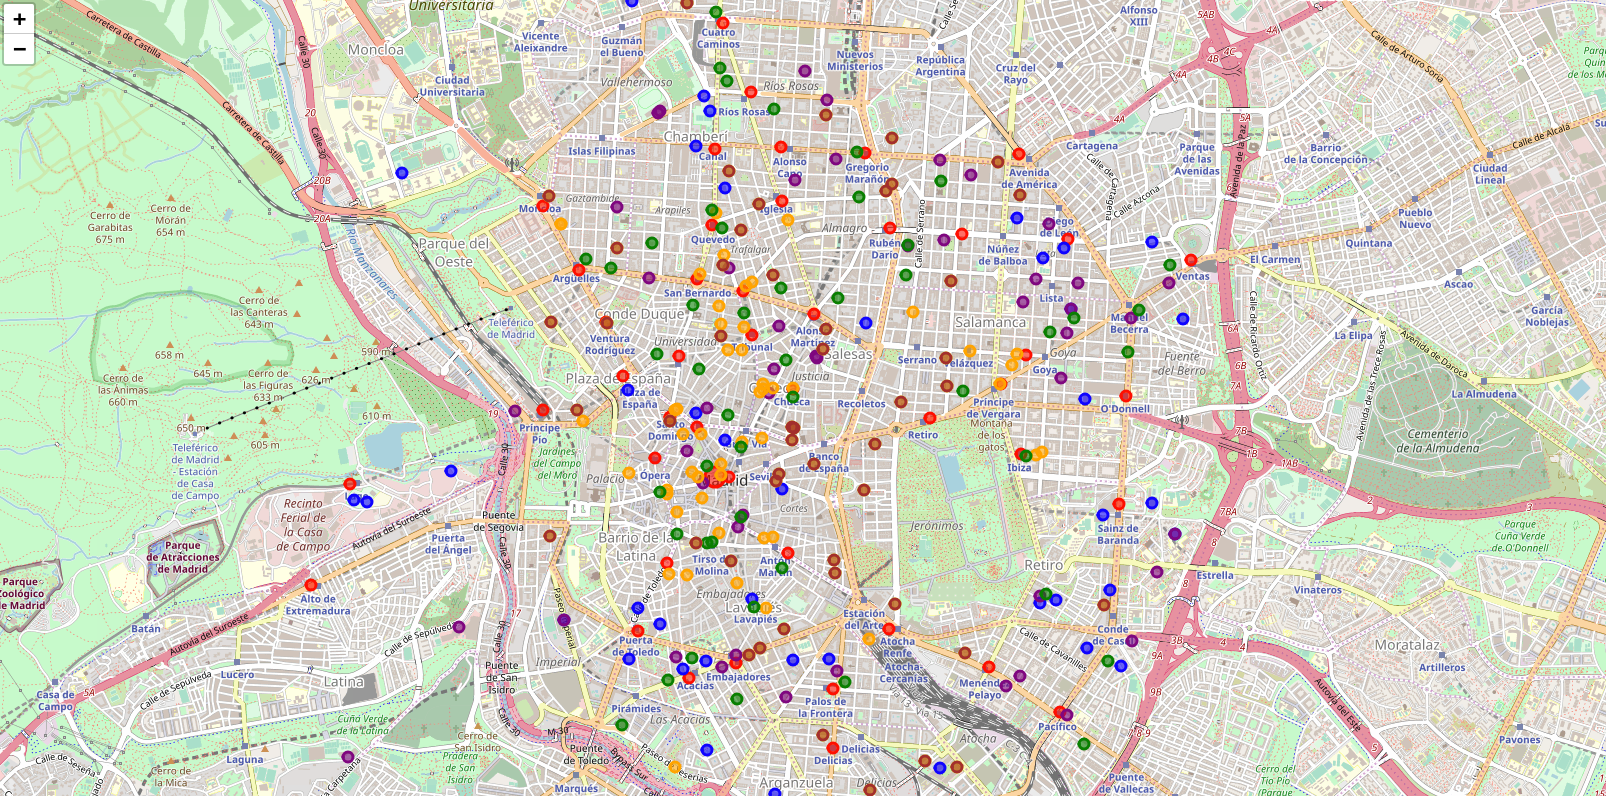

One of the main decisions we took at this stage, right after exploring the metro stations, was to use them as center of our imaginary neighborhoods. The reason behind was that the metro station were splitting the city in areas that had a similar and appropriate size for our purposes. Madrid districts were much more uneven and we thought that those imaginary neighborhoods with center in each metro station were more suitable for our study. 

### 3.2 K-means clustering

With all the previously mentioned data, we created a clean dataframe, in which each row is a neighbourhood, and columns show the amount of businesses of each type.

Additionally, we added one column with a custom ratio, ponderating the different types of businesses, so that we have a ponderated numerical value for each neighbourhood as reference. In that calculation, gyms, supermarkets and coworking spaces have a positive impact, whereas pools, ice cream shops and monuments have a negative impact. Each type doesn't have the same quantitative impact, instead the have weights that try to reflect their actual relevance -for example, pools have a higher negative impact in the ratio than ice cream shops. A lower ratio should mean a better suited neighbourhood.

From our clean dataframe, we used K-means clustering to create the following four clusters, that will be analysed in the next section:

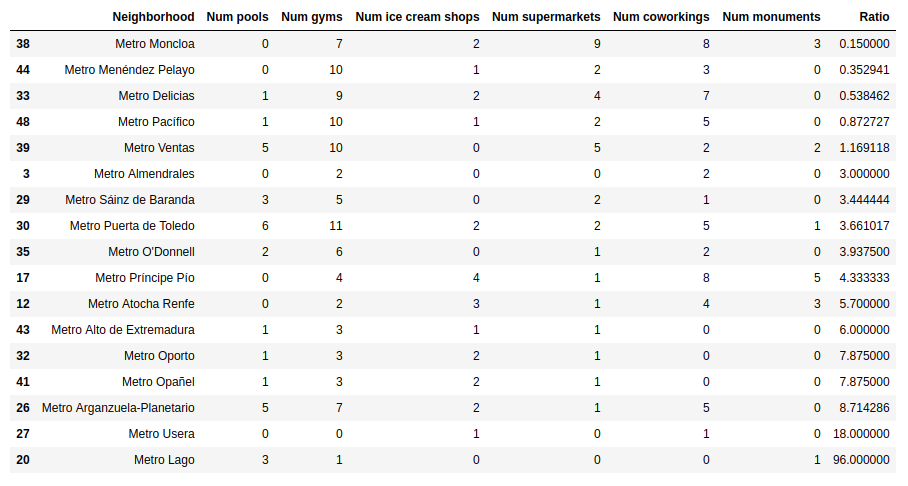
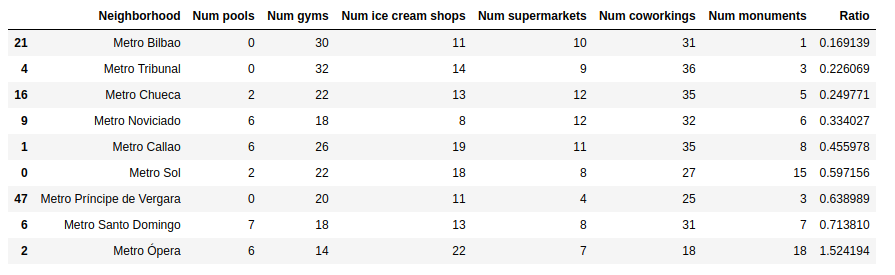
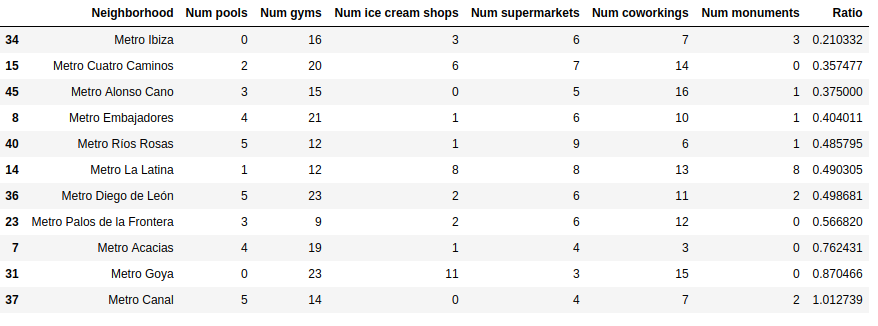
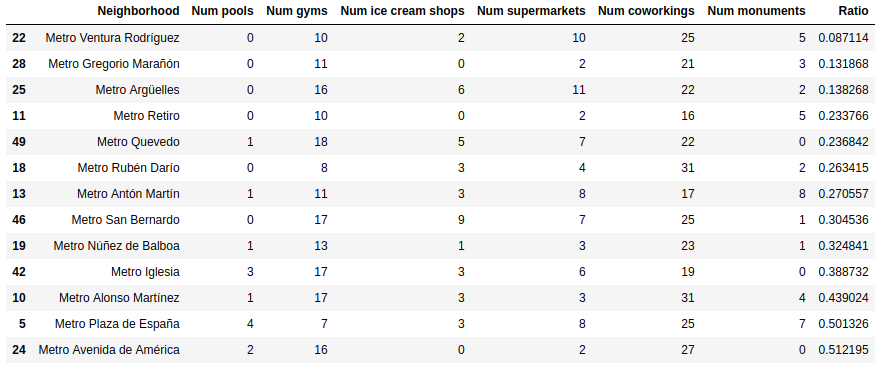


## 4. Results

The resulting clusters look pretty interesting, with clearly differentiated characteristics:

* Cluster 0 contains the neighbourhoods with fewer gyms, supermarkets, ice cream shops, coworking spaces and monuments. At the same time is not the cluster with fewer swimming pools. This cluster corresponds to the outskirts neighbourhoods, where we can expect low rental prices, but also not many people spending their working hours there. The absence of similar busnesses, like gyms, makes us discard cluster 0.

* Cluster 1 contains the most touristic areas, with plenty of business of all kinds, but also expected very high rental prices.

* Clusters 2 and 3 are somehow similar: with a good amount of gyms and supermarkets, not the most central but also not too far from the center and therefore quite well connected. The main difference we can notice between cluster 2 and 3 is the higher amount of coworking spaces in cluster 3, which can point towards areas with office buildings, where people spend their working days, which is exactly what we are looking for. Also, we can see that there is a similar amount of gyms in clusters 3 and 2, but a lower amount of pools in cluster 3, which is also good for our future business. That lead us to pick a neighbourhood from cluster 3.

Among the neighbourhoods in cluster 3, we want to look for one that with zero swimming pools nearby, a high amount of similar businesses nearby, and a low amount of undesired businesses/spots nerby. The top three neighbourhoods of cluster 3 meet this criteria. Not surprisingly, they also have the best (lowest) calculated custom ratio, which basically sumarizes the information about desired and undesired business nearby.

Finally, order to make a final decision among our last candidates, we use the rental data collected by the [main Spanish real-state portal](https://www.idealista.com/news/estadisticas/precio-linea-metro/madrid). The date is especially well suited for us, since it also takes metro stations as reference points. There we can see the following average prices for rent and purchase:

* Metro Ventura Rodríguez: rental price 15 €/m², purchase price 3.616 €/m²
* Metro Greforio Marañon: rental price 15,1 €/m², purchase price 4.599 €/m²
* Metro Argüelles: rental price 14,7 €/m², purchase price 3.654 €/m²

Based on this we would discard Metro Gregorio Marañon, and pick between Ventura Rodriguez and Argüelles. Our final decision would be to pick a spot near **Metro Argüelles**, since not only the rental/purchase price is slightly lower, but it also has better connections, with three metro lines arriving there, instead of just one.


## 5. Discussion

For our purposes, we could have also chosen a neighbourhood from cluster . That would make sense if we were looking for

Similarly, if we were looking for

* Discuss how there were other posibilities

* Discuss how we could pick something slightly different if we are looking for a different target

## 6. Conclusions

* Sum up
In this project we have leveraged the Foursquare API, using it to explore neighbourhoods and analyse them based on the type of businesses that are more and less frequent. Using that, we have created K-mean clusters that split the city in four different areas that make total sense in terms of rental prices and 
